In [12]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()
import numpy as np 

In [3]:
data = pd.read_csv("Concrete_Data.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [6]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

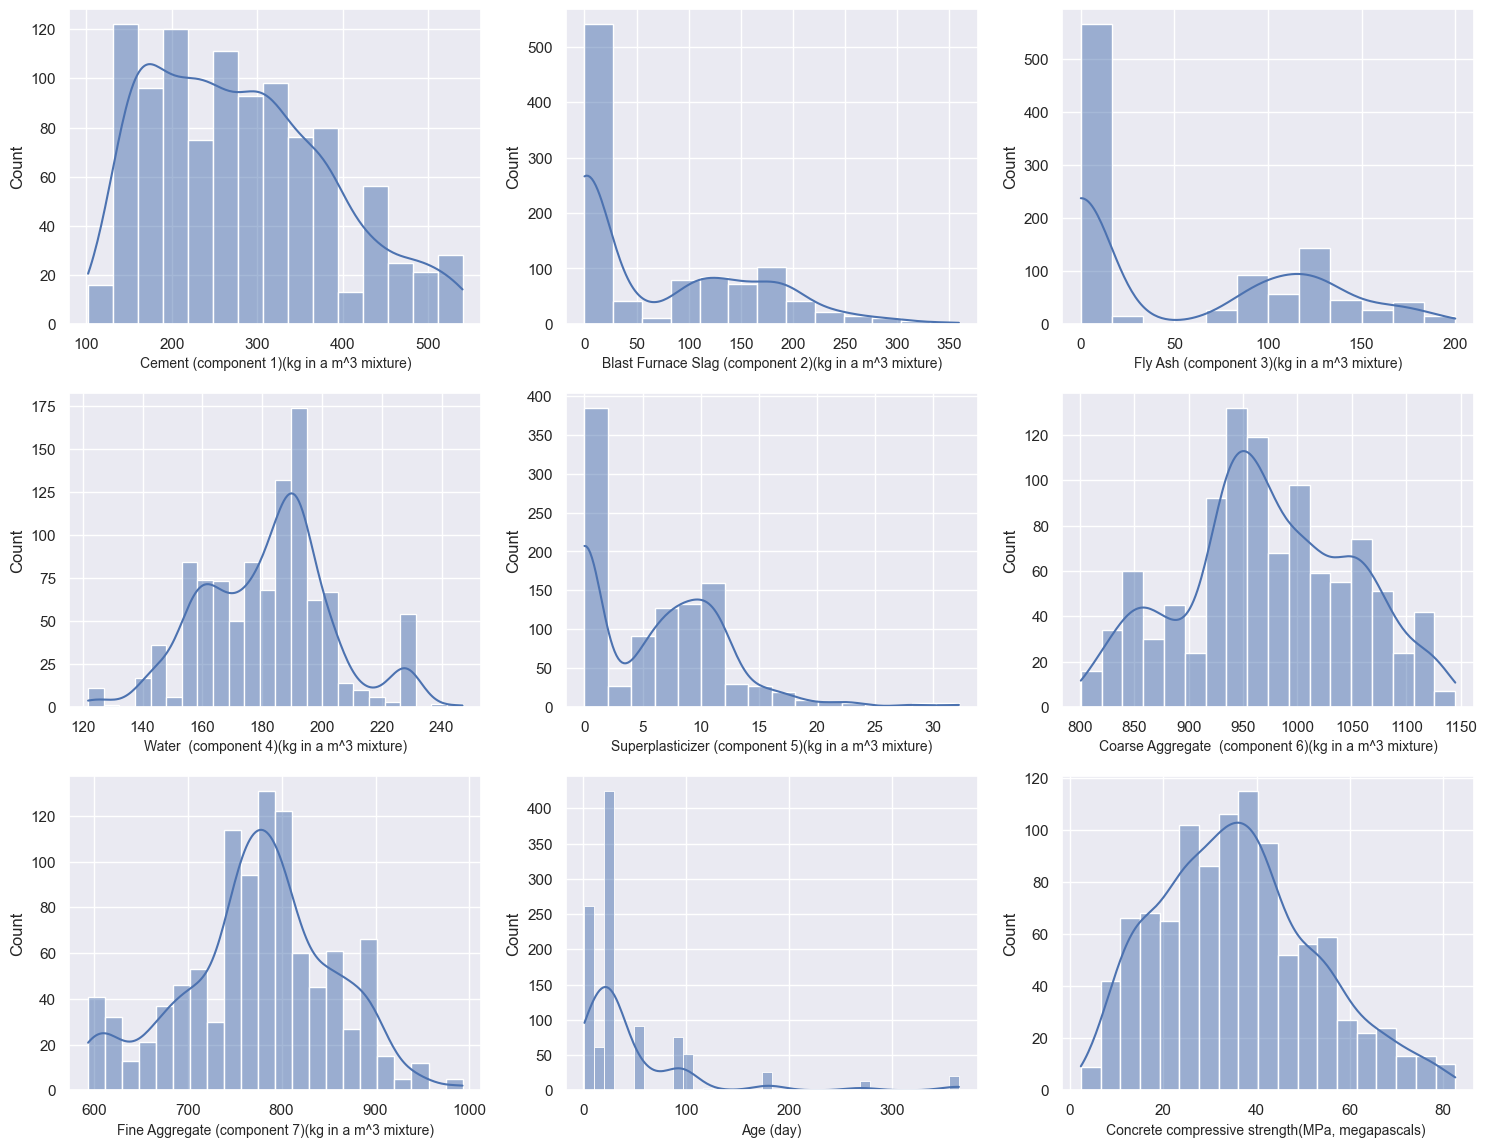

In [8]:
plt.figure(figsize=(15, 15), facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plt.subplot(4, 3, plotnumber)
    sns.histplot(data[column], kde=True)  
    plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout() 
plt.show()


## Data Transformation

In [13]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [14]:
y = data['Concrete compressive strength(MPa, megapascals) ']

In [15]:
# before doing the log transformation, 
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0

for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

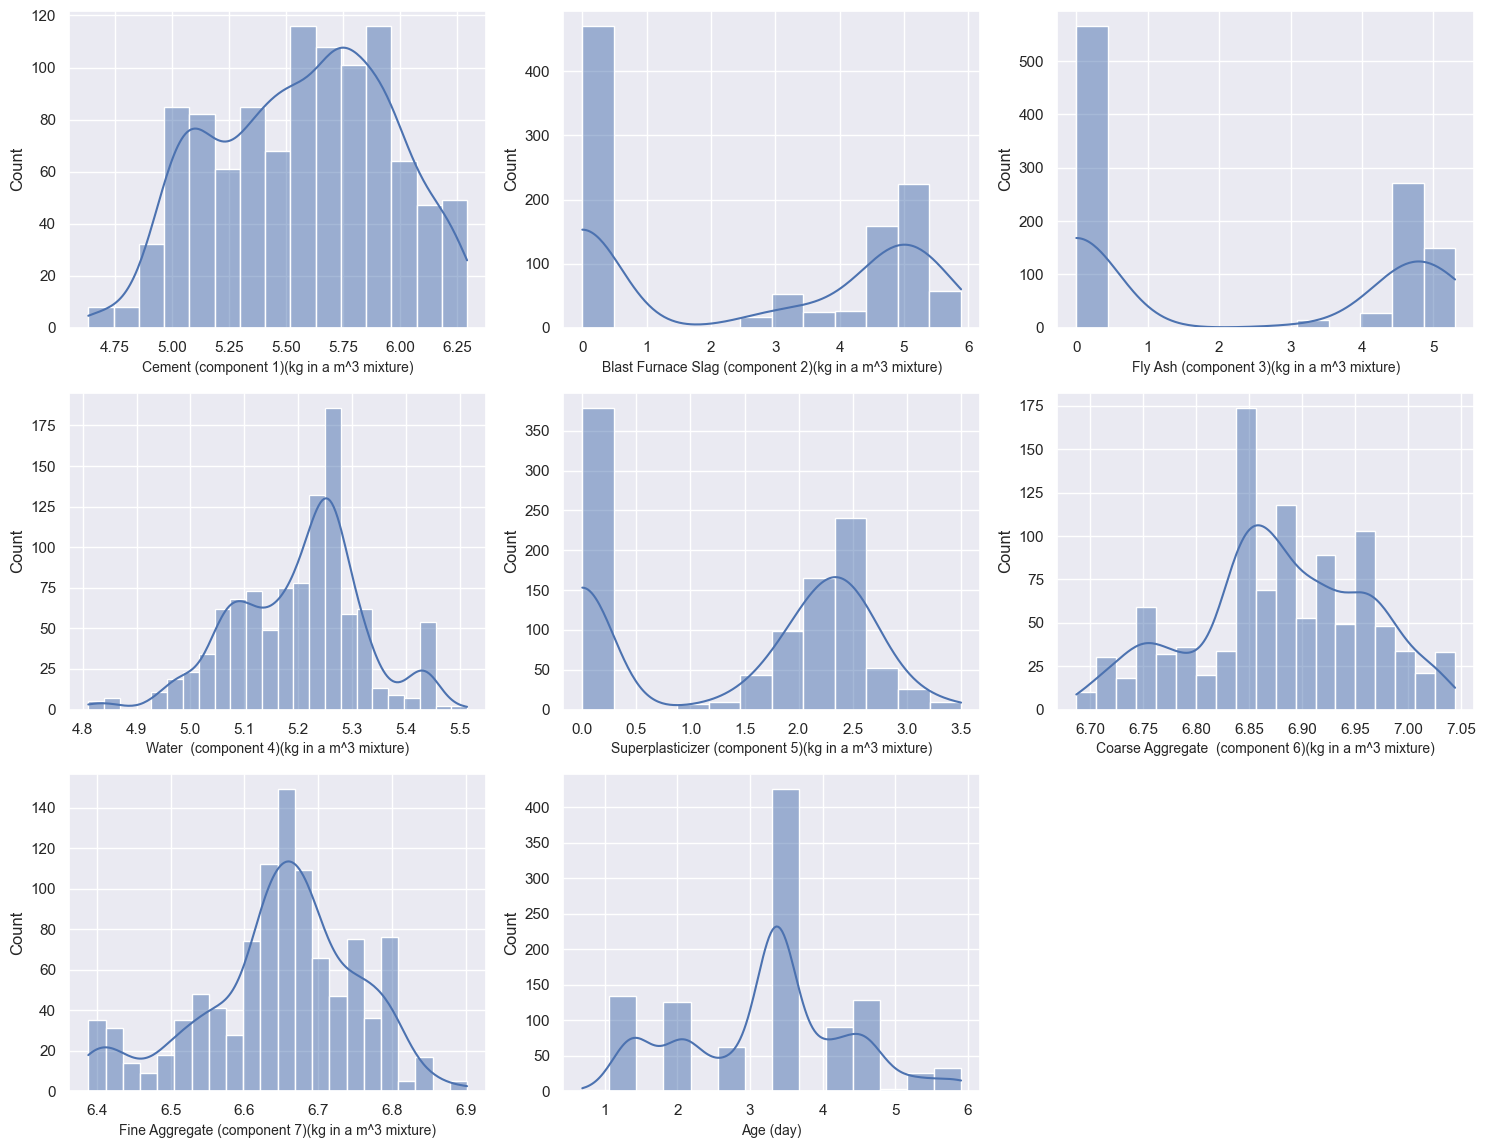

In [17]:
# Set up the plot figure
plt.figure(figsize=(15, 15), facecolor='white')
plotnumber = 1

# Loop through each column in the DataFrame X
for column in X.columns:
    ax = plt.subplot(4, 3, plotnumber)  # Create subplot
    sns.histplot(X[column], kde=True, ax=ax)  # Use histplot instead of distplot
    plt.xlabel(column, fontsize=10)  # Label x-axis
    plotnumber += 1

# Show the plots
plt.tight_layout()
plt.show()

Now that the data is log-transformed and distributions are more normalized, you can proceed with training regression models like linear regression, decision trees, or ensemble methods.

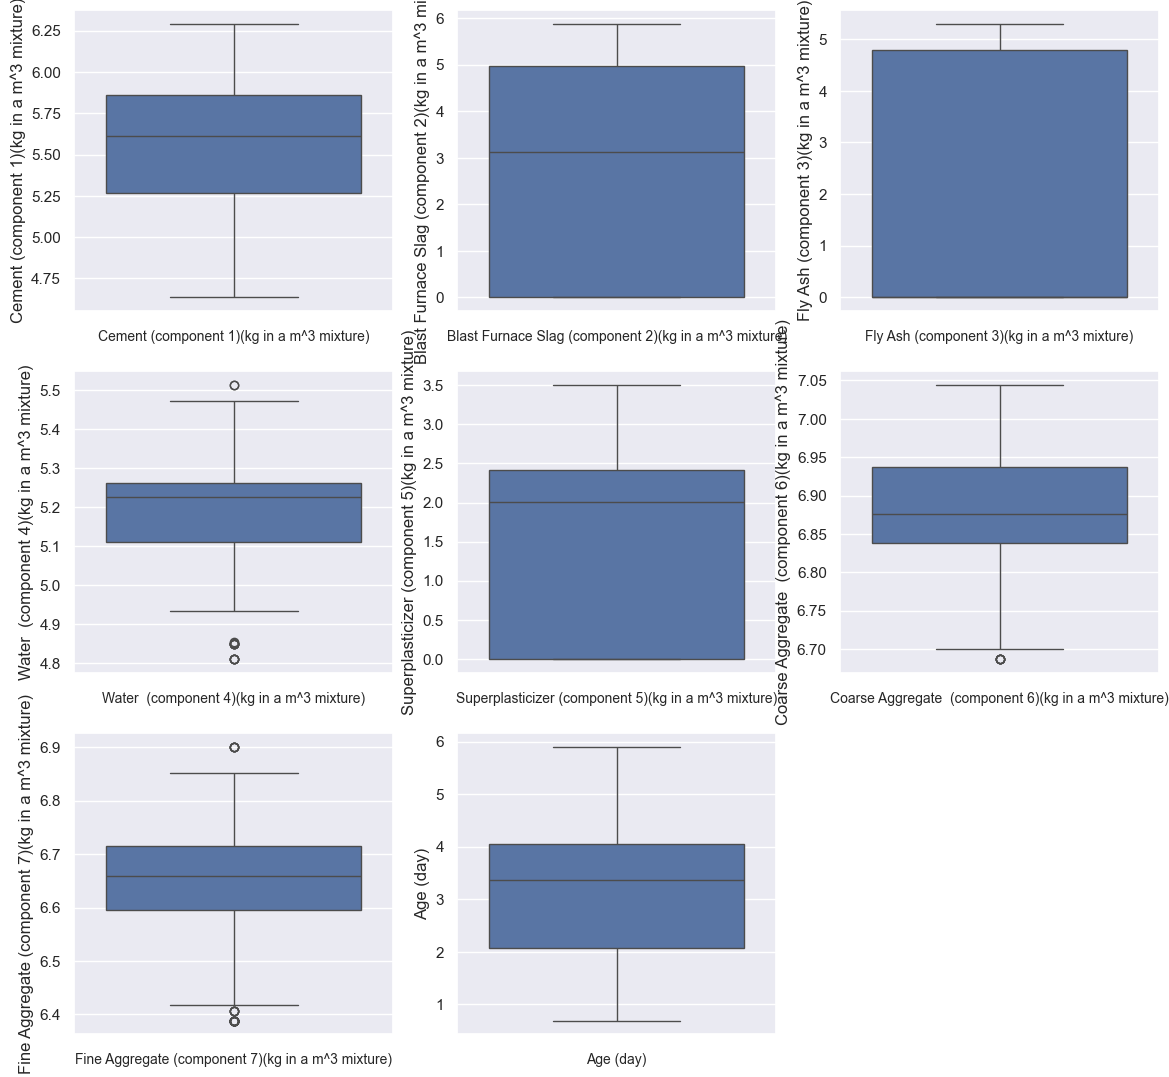

In [22]:
# let's check for outliers 

plot.figure(figsize=(14,18),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

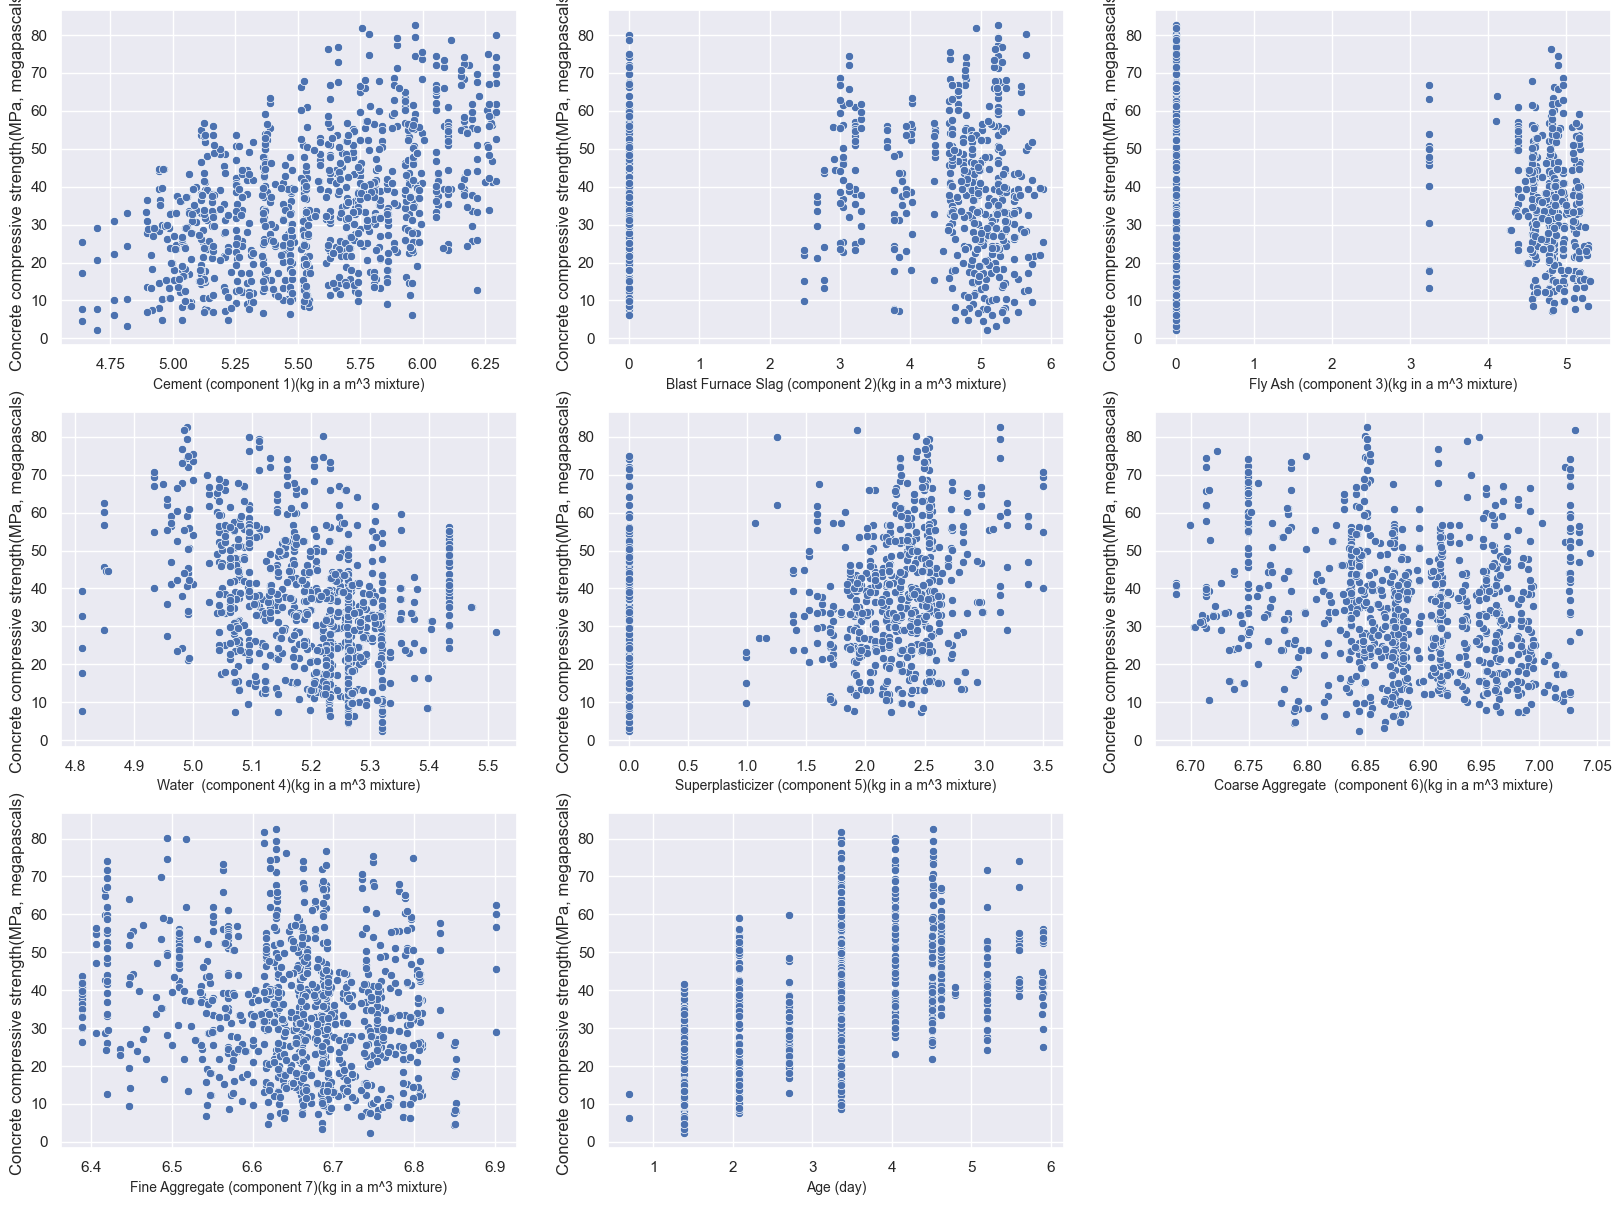

In [25]:
plot.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4, 3, plotnumber)
    sns.scatterplot(x=X[column], y=y)  # Use x and y as keyword arguments
    plot.xlabel(column, fontsize=10)
    plotnumber += 1

plot.show()


Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data.
We will also Random forest regressor and compare our results from both the models.

In [178]:
# let's check for correaltion using heatmap

<Axes: >

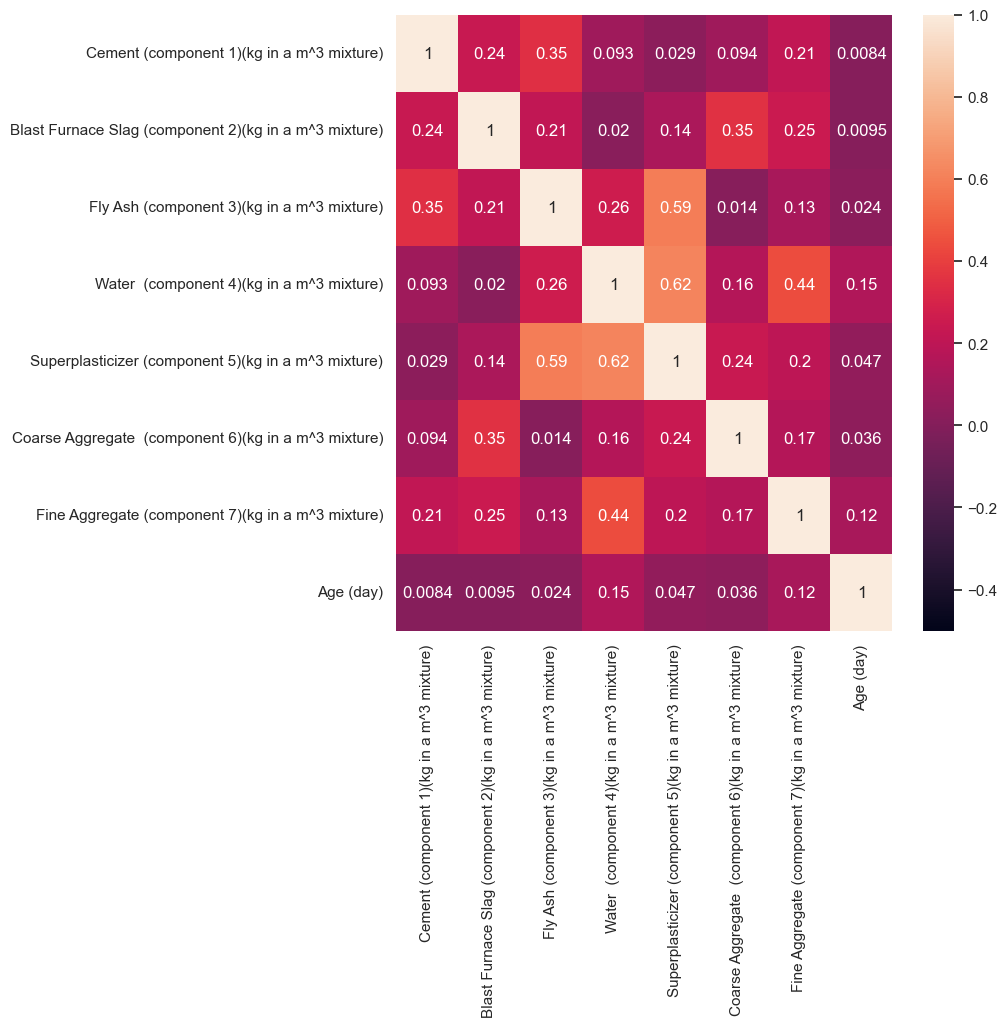

In [26]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther is an issue with 3.1.1 , annotation gets cut from top and bottom


Great! none of our columns seem to be correlated.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scalar = StandardScaler()

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=36,)

x_train = pd.DataFrame(scalar.fit_transform(x_train),columns = x_train.columns, index=x_train.index )
x_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns, index=x_test.index)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Common function for model training, prediction, and evaluation
def evaluate_model(model, x_train, x_test, y_train, y_test):
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model performance
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    print("-" * 40)
    
    return mse, r2

# List of models to evaluate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
    SVR()
]

# Evaluate each model
for model in models:
    evaluate_model(model, x_train, x_test, y_train, y_test)


Model: LinearRegression
Mean Squared Error: 57.13476926129887
R² Score: 0.8011602864602174
----------------------------------------
Model: Ridge
Mean Squared Error: 57.127121847244695
R² Score: 0.8011869008955169
----------------------------------------
Model: Lasso
Mean Squared Error: 59.48272160990056
R² Score: 0.7929889718922726
----------------------------------------
Model: DecisionTreeRegressor
Mean Squared Error: 45.621081877022654
R² Score: 0.8412300781278078
----------------------------------------
Model: RandomForestRegressor
Mean Squared Error: 26.468227467933907
R² Score: 0.9078856038857811
----------------------------------------
Model: XGBRegressor
Mean Squared Error: 51.45291282383299
R² Score: 0.8209342125827328
----------------------------------------
Model: SVR
Mean Squared Error: 56.23977586734253
R² Score: 0.8042750313410517
----------------------------------------


Therefor we can say that RandomForestRegressor gives the best result.